# Exploratory Data Analysis

In [1]:
#!pip3 install seaborn

Set working directory

In [2]:
print(os.getcwd())
#os.chdir('C:\\Users\\asandovaljim\\Documents\\PythonScripts')
print(os.getcwd())

/Users/tata/Downloads/all
/Users/tata/Downloads/all


# Load the data data

## File descriptions
train.csv - the training set

test.csv - the test set

sample_submission.csv - a sample submission file in the correct format

regions.csv - mapping from region codes to names

## Data fields
Id - a unique id

region - an identifier of a region in England

O3 mean - ozone, daily average computed for a particular region 

PM10 mean - particulate matter 10 micrometers or less in diameter, daily average

PM25 mean - particulate matter 2.5 micrometers or less in diameter, daily average

NO2 mean - nitrogen dioxide, daily average

Temperature mean - Temperature at 2 m, daily average

mortality rate - number of of deaths per 100000 people. This variable is missing in the test - your goal is to predict its value!

In [3]:
# Load data 
regions = pd.read_csv('regions.csv')
#regions = regions.drop(columns=['Unnamed: 0'])
regions.head(10)



,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands
5,E12000006,East of England
6,E12000007,London
7,E12000008,South East
8,E12000009,South West


In [4]:
# Load data 
sample_submission = pd.read_csv('sample_submission.csv')
#sample_submission = sample_submission.drop(columns=['Unnamed: 0'])
sample_submission.head(10)

,Id,mortality_rate
0,18404,0
1,18405,0
2,18406,0
3,18407,0
4,18408,0
5,18409,0
6,18410,0
7,18411,0
8,18412,0
9,18413,0


In [5]:
# Load data 
test = pd.read_csv('test.csv')
#test = test.drop(columns=['Unnamed: 0'])
test.head(10)

,Id,region,date,O3,PM10,PM25,NO2,T2M
0,18404,E12000006,2012-05-28,75.980,20.876,19.123,9.713,290.787
1,18405,E12000006,2012-05-29,73.084,21.660,17.794,8.417,288.474
2,18406,E12000006,2012-05-30,59.350,21.925,17.699,10.878,289.889
3,18407,E12000006,2012-05-31,45.991,14.549,11.386,10.302,287.815
4,18408,E12000006,2012-06-01,52.210,11.208,9.545,8.598,287.627
5,18409,E12000006,2012-06-02,68.120,10.118,7.838,6.656,286.108
6,18410,E12000006,2012-06-03,71.991,5.984,4.365,5.341,282.819
7,18411,E12000006,2012-06-04,60.163,6.463,3.320,3.332,282.857
8,18412,E12000006,2012-06-05,51.144,11.273,7.904,10.263,284.485
9,18413,E12000006,2012-06-06,49.828,8.477,6.131,9.648,287.300


In [6]:
# Load data 
train = pd.read_csv('train.csv')
#train = train.drop(columns=['Unnamed: 0'])
train.head(10)

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961
5,6,E12000001,2007-01-07,1.756,53.226,5.607,NaN,NaN,281.504
6,7,E12000001,2007-01-08,1.756,48.177,4.674,NaN,NaN,279.519
7,8,E12000001,2007-01-09,2.147,56.917,5.979,NaN,NaN,281.866
8,9,E12000001,2007-01-10,2.186,45.757,3.433,NaN,NaN,278.044
9,10,E12000001,2007-01-11,1.249,56.388,6.159,NaN,NaN,280.358


Dimensions of the datasets:

In [7]:
# shape of the data
print("Size Regions", regions.shape)
print("Size Sample Submission", sample_submission.shape)
print("Size Test", test.shape)
print("Size Train", train.shape)

Size Regions (9, 2)
Size Sample Submission (7886, 2)
Size Test (7886, 8)
Size Train (18403, 9)


## Descriptive Overview of the data

## Numerical Data 

In [8]:
# for numerical features
regions.describe()

,Code,Region
count,9,9
unique,9,9
top,E12000009,South West
freq,1,1


In [9]:
# for numerical features
sample_submission.describe()

,Id,mortality_rate
count,7886.000000,7886.0
mean,22346.500000,0.0
std,2276.636444,0.0
min,18404.000000,0.0
25%,20375.250000,0.0
50%,22346.500000,0.0
75%,24317.750000,0.0
max,26289.000000,0.0


In [10]:
# for numerical features
test.describe()

,Id,O3,PM10,PM25,NO2,T2M
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000
mean,22346.500000,49.527998,14.545470,8.749311,13.140902,283.410366
std,2276.636444,16.086797,7.660908,6.437121,8.848008,5.274034
min,18404.000000,1.559000,2.506000,0.850000,1.386000,268.696000
25%,20375.250000,39.843000,9.467250,4.620250,6.732750,279.458500
50%,22346.500000,50.935500,12.364000,6.810000,10.627500,283.518000
75%,24317.750000,60.379000,17.353750,10.872000,16.864750,287.707250
max,26289.000000,103.718000,67.361000,56.717000,67.063000,296.740000


In [11]:
# for numerical features
train.describe()

,Id,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.000000,18403.000000,18394.000000,18394.000000,15127.000000,11833.000000,18403.000000
mean,9202.000000,1.301737,45.325857,13.712272,7.498714,12.045813,283.002235
std,5312.632838,0.304161,16.221330,7.421616,5.758357,8.296675,5.182186
min,1.000000,0.439000,0.988000,2.020000,0.904000,1.104000,265.562000
25%,4601.500000,1.102000,35.074250,8.656250,3.624000,6.056000,279.321500
50%,9202.000000,1.281000,45.836000,11.704500,5.636000,9.769000,283.270000
75%,13802.500000,1.474000,55.881000,16.589000,9.326500,15.858000,287.240500
max,18403.000000,2.841000,105.693000,60.627000,45.846000,76.765000,297.209000


## Categorical Data 

In [12]:
# data for categorical features
regions.describe(include=["O"])

,Code,Region
count,9,9
unique,9,9
top,E12000009,South West
freq,1,1


In [13]:
# data for categorical features
#sample_submission.describe(include=["O"])

In [14]:
# data for categorical features
test.describe(include=["O"])

,region,date
count,7886,7886
unique,9,1096
top,E12000009,2013-03-29
freq,1096,9


In [15]:
# data for categorical features
train.describe(include=["O"])

,region,date
count,18403,18403
unique,9,2191
top,E12000001,2008-10-22
freq,2191,9


# Data preparation

## Checking for missing data


In [16]:
def missing_data(df, name):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print('Missing values:', name)
    print(round(missing_df,2))

In [17]:
train.isnull().sum().sort_values(ascending=False)
# first ignore missing data see how the method works

NO2               6570
PM25              3276
PM10                 9
O3                   9
T2M                  0
mortality_rate       0
date                 0
region               0
Id                   0
dtype: int64

In [18]:
missing_data(regions, 'Regions')

Missing values: Regions
        Total  Percent
Region      0      0.0
Code        0      0.0


In [19]:
missing_data(sample_submission, 'Sample Submission')

Missing values: Sample Submission
                Total  Percent
mortality_rate      0      0.0
Id                  0      0.0


In [20]:
missing_data(test, 'Test Data')

Missing values: Test Data
        Total  Percent
T2M         0      0.0
NO2         0      0.0
PM25        0      0.0
PM10        0      0.0
O3          0      0.0
date        0      0.0
region      0      0.0
Id          0      0.0


In [21]:
missing_data(train, 'Train Data')

Missing values: Train Data
                Total  Percent
NO2              6570    35.70
PM25             3276    17.80
PM10                9     0.05
O3                  9     0.05
T2M                 0     0.00
mortality_rate      0     0.00
date                0     0.00
region              0     0.00
Id                  0     0.00


# Handling Missing Values

In [22]:
train.corr()

,Id,mortality_rate,O3,PM10,PM25,NO2,T2M
Id,1.000000,-0.238098,0.090934,0.032339,0.178228,-0.035120,-0.029081
mortality_rate,-0.238098,1.000000,-0.060490,-0.087066,-0.075311,-0.074510,-0.488592
O3,0.090934,-0.060490,1.000000,-0.221377,-0.184900,-0.680321,0.335717
PM10,0.032339,-0.087066,-0.221377,1.000000,0.907125,0.600220,-0.060965
PM25,0.178228,-0.075311,-0.184900,0.907125,1.000000,0.570076,-0.072937
NO2,-0.035120,-0.074510,-0.680321,0.600220,0.570076,1.000000,-0.340037
T2M,-0.029081,-0.488592,0.335717,-0.060965,-0.072937,-0.340037,1.000000


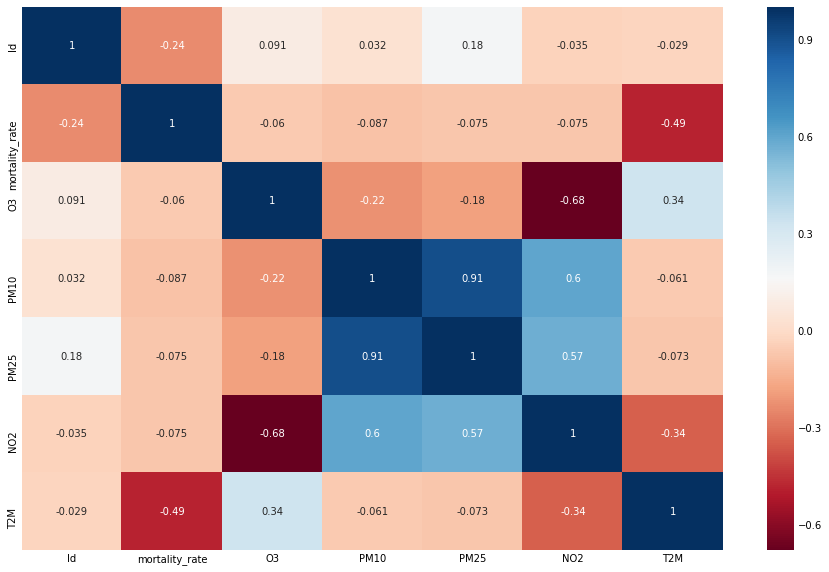

In [23]:
plt.figure(figsize = [14,10])
sns.heatmap(train.corr(), cmap = 'RdBu', annot = True)

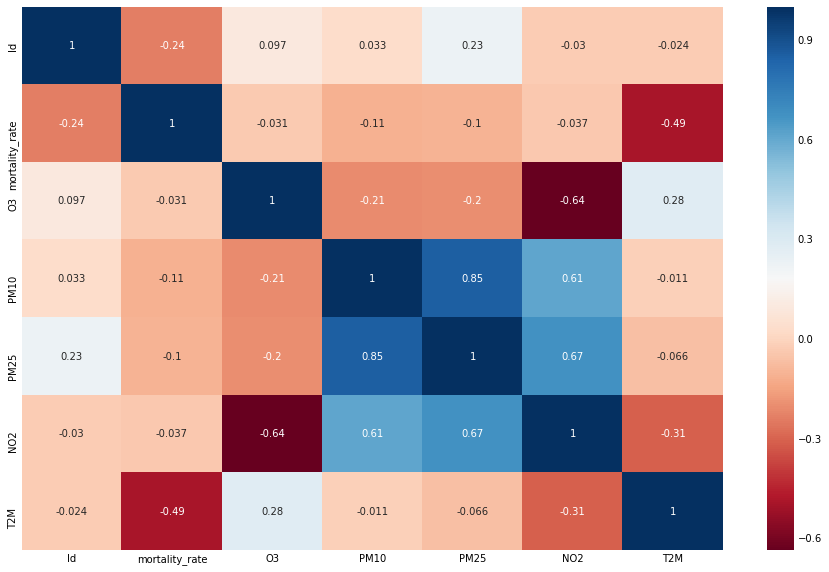

In [24]:
plt.figure(figsize = [14,10])
sns.heatmap(train.corr(method = 'spearman'), cmap = 'RdBu', annot = True)

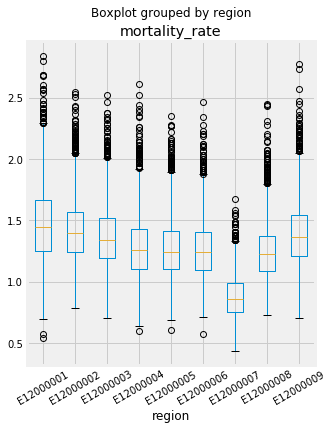

In [25]:
train.boxplot('mortality_rate','region',rot = 30,figsize=(5,6))

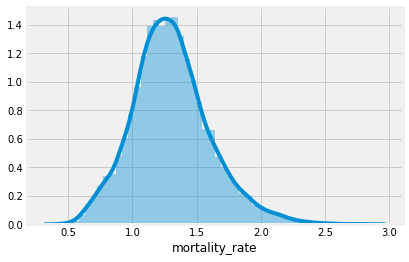

In [26]:
sns.distplot(train.mortality_rate)

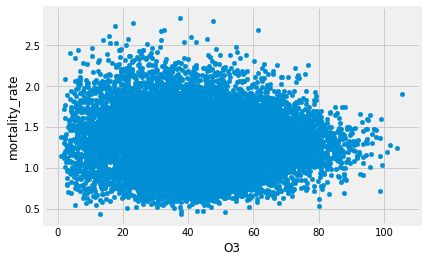

In [28]:
train.plot(x="O3",y="mortality_rate", kind="scatter")

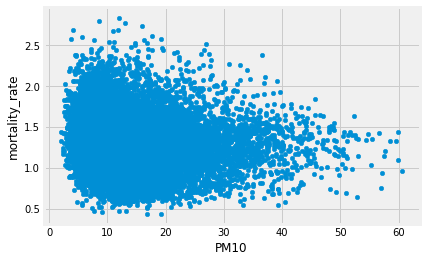

In [29]:
train.plot(x="PM10",y="mortality_rate", kind="scatter")

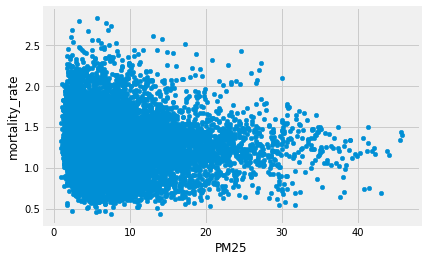

In [30]:
train.plot(x="PM25",y="mortality_rate", kind="scatter")

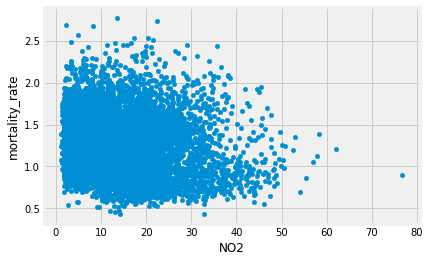

In [31]:
train.plot(x="NO2",y="mortality_rate", kind="scatter")

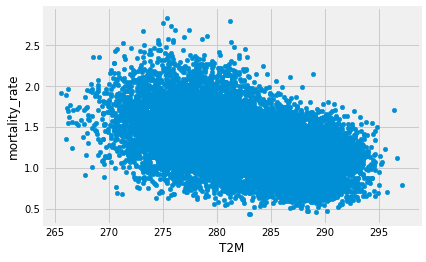

In [32]:
train.plot(x="T2M",y="mortality_rate", kind="scatter")

In [33]:
#check minimum values each attribute
regions.describe()

,Code,Region
count,9,9
unique,9,9
top,E12000009,South West
freq,1,1


In [34]:
#check minimum values each attribute
sample_submission.describe()

,Id,mortality_rate
count,7886.000000,7886.0
mean,22346.500000,0.0
std,2276.636444,0.0
min,18404.000000,0.0
25%,20375.250000,0.0
50%,22346.500000,0.0
75%,24317.750000,0.0
max,26289.000000,0.0


In [35]:
#check minimum values each attribute
round(test.describe(), 2)

,Id,O3,PM10,PM25,NO2,T2M
count,7886.00,7886.00,7886.00,7886.00,7886.00,7886.00
mean,22346.50,49.53,14.55,8.75,13.14,283.41
std,2276.64,16.09,7.66,6.44,8.85,5.27
min,18404.00,1.56,2.51,0.85,1.39,268.70
25%,20375.25,39.84,9.47,4.62,6.73,279.46
50%,22346.50,50.94,12.36,6.81,10.63,283.52
75%,24317.75,60.38,17.35,10.87,16.86,287.71
max,26289.00,103.72,67.36,56.72,67.06,296.74


In [36]:
#check minimum values each attribute
round(train.describe(), 2)

,Id,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.00,18403.00,18394.00,18394.00,15127.00,11833.00,18403.00
mean,9202.00,1.30,45.33,13.71,7.50,12.05,283.00
std,5312.63,0.30,16.22,7.42,5.76,8.30,5.18
min,1.00,0.44,0.99,2.02,0.90,1.10,265.56
25%,4601.50,1.10,35.07,8.66,3.62,6.06,279.32
50%,9202.00,1.28,45.84,11.70,5.64,9.77,283.27
75%,13802.50,1.47,55.88,16.59,9.33,15.86,287.24
max,18403.00,2.84,105.69,60.63,45.85,76.76,297.21


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18403 entries, 0 to 18402
Data columns (total 9 columns):
Id                18403 non-null int64
region            18403 non-null object
date              18403 non-null object
mortality_rate    18403 non-null float64
O3                18394 non-null float64
PM10              18394 non-null float64
PM25              15127 non-null float64
NO2               11833 non-null float64
T2M               18403 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7886 entries, 0 to 7885
Data columns (total 8 columns):
Id        7886 non-null int64
region    7886 non-null object
date      7886 non-null object
O3        7886 non-null float64
PM10      7886 non-null float64
PM25      7886 non-null float64
NO2       7886 non-null float64
T2M       7886 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 493.0+ KB


In [39]:
train_copy = train
train_copy.head()

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961


# one hot encoding

In [40]:
# limit to categorical data using df.select_dtypes()
X = train['region']
X.head(3)

0    E12000001
1    E12000001
2    E12000001
Name: region, dtype: object

In [41]:
# check original shape
X.shape

(18403,)

In [42]:
regions['Region']

0                  North East
1                  North West
2    Yorkshire and The Humber
3               East Midlands
4               West Midlands
5             East of England
6                      London
7                  South East
8                  South West
Name: Region, dtype: object

In [82]:
# one hot encoding for region
regions_hot = pd.get_dummies(X)
# rename columns 
regions_hot.columns = regions['Region']
regions_hot.columns


Index(['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands',
       'West Midlands', 'East of England', 'London', 'South East',
       'South West'],
      dtype='object', name='Region')

In [44]:
regions_hot.head()

Region,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [45]:
# drop region column from train data set
train = train.drop(['region'], axis=1)

In [46]:
result = regions_hot.join(train)
result.head()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West,Id,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,0,0,0,0,0,0,0,0,1,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,1,0,0,0,0,0,0,0,0,2,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,1,0,0,0,0,0,0,0,0,3,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,1,0,0,0,0,0,0,0,0,4,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,1,0,0,0,0,0,0,0,0,5,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961


In [47]:
cols = list(result)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Id')))
# use ix to reorder
result = result.ix[:, cols]
result.head()

,Id,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,1,0,0,0,0,0,0,0,0,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,1,0,0,0,0,0,0,0,0,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,1,0,0,0,0,0,0,0,0,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,1,0,0,0,0,0,0,0,0,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,1,0,0,0,0,0,0,0,0,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961


# Transform date as numerical

In [75]:
import datetime
dates = result['date']

# result = result.drop(['date'], axis=1)
dates_sep = [date.split('-') for date in dates]

date_fields = []
for (year, month, day) in dates_sep:
    datetime_obj = datetime.datetime(int(year), int(month), int(day))
    weekday = datetime_obj.strftime('%A')
    month = datetime_obj.strftime('%B')
    date_fields.append([month, weekday])

date_fields = pd.DataFrame(date_fields)
date_fields.columns = ('Month', 'Weekday')

# one hot encoding for date
date_hot = pd.DataFrame([])
for column in ['Month', 'Weekday']:
    dummies = pd.get_dummies(date_fields[column])
    date_hot[dummies.columns] = dummies

result = date_hot.join(result)

ValueError: columns overlap but no suffix specified: Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [77]:
result = result.drop(['date'], axis = 1) # id is not used
result.head()

,April,August,December,February,January,July,June,March,May,November,...,East of England,London,South East,South West,mortality_rate,O3,PM10,PM25,NO2,T2M
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2.264,42.358,9.021,NaN,NaN,278.138
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2.030,49.506,5.256,NaN,NaN,281.745
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1.874,51.101,4.946,NaN,NaN,280.523
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2.069,47.478,6.823,NaN,NaN,280.421
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1.913,45.226,7.532,NaN,NaN,278.961


In [76]:
result.head()

,April,August,December,February,January,July,June,March,May,November,...,London,South East,South West,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961


In [78]:
cols = list(result)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('mortality_rate')))
# use ix to reorder
result = result.ix[:, cols]
result.head()

,mortality_rate,April,August,December,February,January,July,June,March,May,...,West Midlands,East of England,London,South East,South West,O3,PM10,PM25,NO2,T2M
0,2.264,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,42.358,9.021,NaN,NaN,278.138
1,2.030,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,49.506,5.256,NaN,NaN,281.745
2,1.874,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,51.101,4.946,NaN,NaN,280.523
3,2.069,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,47.478,6.823,NaN,NaN,280.421
4,1.913,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,45.226,7.532,NaN,NaN,278.961


# fancyimpute

In [ ]:
#!pip3 install fancyimpute

In [79]:
from fancyimpute import KNN

Using TensorFlow backend.


In [80]:
raw_normalized = KNN(k=3).fit_transform(result)
normalized_data = pd.DataFrame(raw_normalized)
normalized_data.columns = result.columns
normalized_data

Imputing row 1/18403 with 2 missing, elapsed time: 106.907
Imputing row 101/18403 with 2 missing, elapsed time: 106.937
Imputing row 201/18403 with 2 missing, elapsed time: 106.952
Imputing row 301/18403 with 2 missing, elapsed time: 106.971
Imputing row 401/18403 with 2 missing, elapsed time: 106.985
Imputing row 501/18403 with 2 missing, elapsed time: 107.000
Imputing row 601/18403 with 2 missing, elapsed time: 107.026
Imputing row 701/18403 with 2 missing, elapsed time: 107.041
Imputing row 801/18403 with 2 missing, elapsed time: 107.059
Imputing row 901/18403 with 2 missing, elapsed time: 107.078
Imputing row 1001/18403 with 2 missing, elapsed time: 107.094
Imputing row 1101/18403 with 2 missing, elapsed time: 107.111
Imputing row 1201/18403 with 2 missing, elapsed time: 107.137
Imputing row 1301/18403 with 2 missing, elapsed time: 107.158
Imputing row 1401/18403 with 2 missing, elapsed time: 107.177
Imputing row 1501/18403 with 2 missing, elapsed time: 107.204
Imputing row 1601/18

,mortality_rate,April,August,December,February,January,July,June,March,May,...,West Midlands,East of England,London,South East,South West,O3,PM10,PM25,NO2,T2M
0,2.264,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,42.358,9.021,6.180234,8.537813,278.138
1,2.030,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49.506,5.256,6.180248,8.537812,281.745
2,1.874,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,51.101,4.946,6.180256,8.537812,280.523
3,2.069,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.478,6.823,6.180245,8.537812,280.421
4,1.913,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,45.226,7.532,6.180240,8.537812,278.961
5,1.756,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.226,5.607,6.180263,8.537811,281.504
6,1.756,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,48.177,4.674,6.180242,8.537812,279.519
7,2.147,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56.917,5.979,6.180278,8.537810,281.866
8,2.186,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,45.757,3.433,6.180231,8.537814,278.044
9,1.249,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56.388,6.159,6.180278,8.537809,280.358


In [81]:
normalized_data.to_csv('train_norm.csv')

## Test data norm